In [1]:
from db import connect_npsql, convert_array, get_sector_list
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import brentq
from process_field_impl import *


# con = connect_npsql('../../ed_data/136g1_complete.db')
con = connect_npsql('../../ed_data/136g1.Y_complete.db')
# con = connect_npsql('../../ed_data/136g2.I_complete.db')
# con = connect_npsql('../../ed_data/results_old.db')
# con = connect_npsql('../../ed_data/test/results_1007.db')
# con.execute("PRAGMA journal_mode=DELETE")
con.commit()



In [2]:

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.rcParams.update(tex_fonts)

In [3]:
lats = load_geometries(con)
print("Loaded geometries: ")
for l in lats:
    print(convert_sparray(l))
    

Loaded geometries: 
[[12 0 -24]
 [-4 -12 0]
 [8 12 -24]]


In [4]:
c = con.execute("SELECT sector FROM field_111 WHERE latvecs=? GROUP BY sector", (lats[0],))
sectors = []
for s in c:
    sectors.append(s[0])
c.close()
sectors

['(0, 0, 18, 18)',
 '(0, 12, 10, 14)',
 '(0, 12, 12, 12)',
 '(0, 12, 14, 10)',
 '(0, 12, 16, 8)',
 '(0, 12, 18, 6)',
 '(0, 12, 6, 18)',
 '(0, 12, 8, 16)',
 '(0, 15, 10, 11)',
 '(0, 15, 12, 9)',
 '(0, 15, 14, 7)',
 '(0, 15, 16, 5)',
 '(0, 15, 18, 3)',
 '(0, 15, 4, 17)',
 '(0, 15, 6, 15)',
 '(0, 15, 8, 13)',
 '(0, 18, 0, 18)',
 '(0, 18, 10, 8)',
 '(0, 18, 12, 6)',
 '(0, 18, 14, 4)',
 '(0, 18, 16, 2)',
 '(0, 18, 18, 0)',
 '(0, 18, 2, 16)',
 '(0, 18, 4, 14)',
 '(0, 18, 6, 12)',
 '(0, 18, 8, 10)',
 '(0, 3, 16, 17)',
 '(0, 3, 18, 15)',
 '(0, 6, 12, 18)',
 '(0, 6, 14, 16)',
 '(0, 6, 16, 14)',
 '(0, 6, 18, 12)',
 '(0, 9, 10, 17)',
 '(0, 9, 12, 15)',
 '(0, 9, 14, 13)',
 '(0, 9, 16, 11)',
 '(0, 9, 18, 9)',
 '(12, 0, 10, 14)',
 '(12, 0, 12, 12)',
 '(12, 0, 14, 10)',
 '(12, 0, 16, 8)',
 '(12, 0, 18, 6)',
 '(12, 0, 6, 18)',
 '(12, 0, 8, 16)',
 '(12, 12, 0, 12)',
 '(12, 12, 10, 2)',
 '(12, 12, 12, 0)',
 '(12, 12, 2, 10)',
 '(12, 12, 4, 8)',
 '(12, 12, 6, 6)',
 '(12, 12, 8, 4)',
 '(12, 15, 0, 9)',
 '

In [5]:
xx, sec, sec_E, sec_names = find_groundstate_111(con, lats[0], 1)

In [6]:
np.array(sec)[:,0]

array([243, 243,  44, 243, 243,  44,  44, 243,  44, 243,  49,  49, 240,
        49,  49, 240,  49,  49, 240, 240,  69, 218,  49,  69,  49, 287,
       258, 251, 258, 287, 287, 287, 287, 287,  75,  69, 218, 212, 212,
        69, 212, 212,  75,  75,  75, 212, 218,  69, 212,  75,  69, 218,
       212,  81, 282, 282, 282, 262, 262, 282])

{np.int64(243): '(6, 6, 18, 6)', np.int64(44): '(12, 12, 0, 12)', np.int64(49): '(12, 12, 6, 6)', np.int64(240): '(6, 6, 12, 12)', np.int64(69): '(12, 6, 12, 6)', np.int64(218): '(6, 12, 6, 12)', np.int64(287): '(9, 6, 8, 13)', np.int64(258): '(9, 12, 10, 5)', np.int64(251): '(6, 9, 8, 13)', np.int64(75): '(12, 6, 6, 12)', np.int64(212): '(6, 12, 12, 6)', np.int64(81): '(12, 9, 4, 11)', np.int64(282): '(9, 6, 14, 7)', np.int64(262): '(9, 12, 4, 11)'}


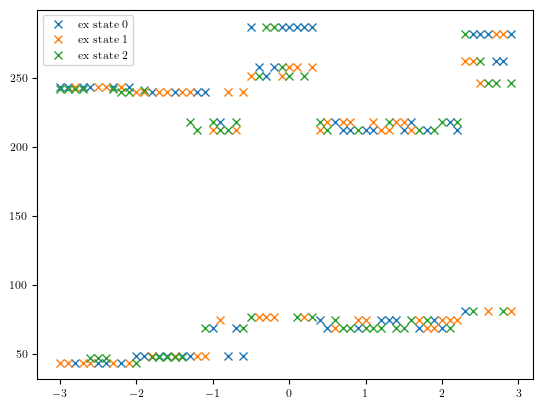

In [7]:
for J in range(3):
    plt.plot(xx, np.array(sec)[:,J],'x',label=f"ex state {J}")

plt.legend()

unique_sectors = {}
for sec_ids in sec:
    gs_sec_id = sec_ids[0]
    unique_sectors[gs_sec_id] = sec_names[gs_sec_id]

print(unique_sectors)

In [8]:
for x, secid in zip(xx, np.array(sec)[:,0]):
    print(f"x={x}, sec {unique_sectors[secid]}")

x=-3.0, sec (6, 6, 18, 6)
x=-2.9, sec (6, 6, 18, 6)
x=-2.8, sec (12, 12, 0, 12)
x=-2.6999999999999997, sec (6, 6, 18, 6)
x=-2.5999999999999996, sec (6, 6, 18, 6)
x=-2.4999999999999996, sec (12, 12, 0, 12)
x=-2.3999999999999995, sec (12, 12, 0, 12)
x=-2.2999999999999994, sec (6, 6, 18, 6)
x=-2.1999999999999993, sec (12, 12, 0, 12)
x=-2.099999999999999, sec (6, 6, 18, 6)
x=-1.9999999999999991, sec (12, 12, 6, 6)
x=-1.899999999999999, sec (12, 12, 6, 6)
x=-1.799999999999999, sec (6, 6, 12, 12)
x=-1.6999999999999988, sec (12, 12, 6, 6)
x=-1.5999999999999988, sec (12, 12, 6, 6)
x=-1.4999999999999987, sec (6, 6, 12, 12)
x=-1.3999999999999986, sec (12, 12, 6, 6)
x=-1.2999999999999985, sec (12, 12, 6, 6)
x=-1.1999999999999984, sec (6, 6, 12, 12)
x=-1.0999999999999983, sec (6, 6, 12, 12)
x=-0.9999999999999982, sec (12, 6, 12, 6)
x=-0.8999999999999981, sec (6, 12, 6, 12)
x=-0.799999999999998, sec (12, 12, 6, 6)
x=-0.699999999999998, sec (12, 6, 12, 6)
x=-0.5999999999999979, sec (12, 12, 6, 6)
x=

In [9]:

def add_phasedia_boundaries(a, jpm_arr, B_arr, B_direction, **kwargs):
    B = np.array(B_direction,dtype=np.float64)
    B /= np.linalg.norm(B)

    
    
    f0 = lambda j,b : Jring(j, b*B)[0] + 0.5*sum(Jring(j, b*B)[1:3])
    f1 = lambda j,b : Jring(j, b*B)[1]


    
    sing_vals_0 = []
    sing_vals_1 = []
    for bb in B_arr:
        res0, res1 = None, None
        try:
            res0 = brentq(f0, 0.000000001, np.max(jpm_arr)*2,args=bb)
        except ValueError:
            res0 =  None

        try:
            if res0 is not None:
                res1 = brentq(f1, res0*0.01, res0*0.9,args=bb)
            else:
                res1 = brentq(f1, 0.01, 0.2,args=bb)
        except ValueError:
            res1 =  None

       
        
        sing_vals_0.append(res0)
        sing_vals_1.append(res1)
            
    
    # a.axvline(0,**kwargs)
    a.plot(sing_vals_0, B_arr, **kwargs)
    a.plot(sing_vals_1, B_arr, **kwargs)
    # a.plot( 0.455 * B_arr**2,B_arr, **kwargs)
    # a.plot( 0.09 * B_arr**2,B_arr, **kwargs)
    a.set_xlim([np.min(jpm_arr), np.max(jpm_arr)])

In [5]:
# Check quality of interpolation



def plot_interp_quality(rfi, x_lims = [-4.2, 4.2], recip=False):
    fig, Ax = plt.subplots(2,2, sharey=True)
    Ax2 = np.array([[ax.twinx() for ax in row] for row in Ax])

    power = -1 if recip else 1
    
    Ax[0,0].set_title(r'$g_{1,2,3}>0$')
    Ax[0,0].plot(np.array(rfi.x_list[1])**power, np.array(rfi.expO_series[1]).T,'.')
    
    
    Ax[0,1].plot(np.array(rfi.x_list[-1])**power, np.array(rfi.expO_series[-1]).T,'.')
    Ax[0,1].set_title(r'$g_{1,2,3}<0$')
    
    Ax[1,0].plot(np.array(rfi.x_list[1])**power, np.array(rfi.expO_series[1]).T,'.')
    Ax[1,1].plot(np.array(rfi.x_list[-1])**power, np.array(rfi.expO_series[-1]).T,'.')
    
    xx = np.linspace(np.min(rfi.x_list[1]), np.max(rfi.x_list[1]), 120)
    
    xx_detail = np.linspace(*x_lims, 120)
    
    for i, xax in enumerate([xx, xx_detail]):
        Ax[i,0].plot(xax, [rfi.interpolate_ring(1, x**power) for x in xax])
        Ax[i,1].plot(xax, [rfi.interpolate_ring(-1, x**power) for x in xax])
    
    for a in Ax[1]:
        a.set_xlim(x_lims)
        a.set_ylim([-0.5,0.5])

    xl = r'$g_{1,2,3}/g_0$' if recip else r'$g_0/g_{1,2,3}$'
    
    Ax[1,0].set_xlabel(xl)
    Ax[1,1].set_xlabel(xl)


def plot_E_interp_quality(rfi, x_lims = [-4.2, 4.2], y_lims = [-12,-4], recip=False):
    fig, Ax = plt.subplots(2,2)
    # Ax2 = np.array([[ax.twinx() for ax in row] for row in Ax])
 
    Ax[0,0].set_title(r'$g_{1,2,3}>0$')
    # Ax[0,0].plot(rfi.x_list[1], rfi.E_list[1]-rfi.E_list[1][0,:],'.')
    # Ax[1,0].plot(rfi.x_list[1], rfi.E_list[1]-rfi.E_list[1][0,:],'.')

    power = -1 if recip else 1
    for a in [Ax[0,0], Ax[1,0]]:
        a.plot(np.pow(rfi.x_list[1],power), rfi.E_list[1][:, 0:2],'.')
    
    Ax[0,1].set_title(r'$g_{1,2,3}<0$')
    for a in [Ax[0,1], Ax[1,1]]:
        a.plot(np.pow(rfi.x_list[-1],power), rfi.E_list[-1][:,0:2],'.')
    
    
    
    xx = np.linspace(np.min(rfi.x_list[1]), np.max(rfi.x_list[1]), 120)
    
    xx_detail = np.linspace(*x_lims, 120)
    
    for i, xax in enumerate([xx, xx_detail]):
        # Ax[i,0].plot(xax, [rfi.es1_interpolators[1](x)-rfi.gse_interpolators[1](x) for x in xax],color='k')
        
        # Ax[i,1].plot(xax, [rfi.es1_interpolators[-1](x)-rfi.gse_interpolators[-1](x) for x in xax],color='k')
        Ax[i,0].plot(xax, [rfi.gse_interpolators[1](x**power) for x in xax],color='k')
        Ax[i,0].plot(xax, [rfi.es1_interpolators[1](x**power) for x in xax],color='r')
        
        Ax[i,1].plot(xax, [rfi.gse_interpolators[-1](x**power) for x in xax],color='k')
        Ax[i,1].plot(xax, [rfi.es1_interpolators[-1](x**power) for x in xax],color='r')
    
    for a in Ax[1]:
        a.set_xlim(x_lims)
        a.set_ylim(y_lims)

    # for a in Ax[0]:
    #     # a.set_xlim(x_lims)
    #     a.set_ylim([0,2])
    if recip:
        Ax[1,0].set_xlabel(r'$g_{1,2,3}/g_0$')
        Ax[1,1].set_xlabel(r'$g_{1,2,3}/g_0$')
    else:
        Ax[1,0].set_xlabel(r'$g_0/g_{1,2,3}$')
        Ax[1,1].set_xlabel(r'$g_0/g_{1,2,3}$')



In [6]:

def import_data_111(g123_sign:int, latvecs, sector):
    res = con.execute(f"""
    SELECT g0_g123, edata, expO0, expO1, expO2, expO3 
    FROM field_111
    WHERE g123_sign = ? AND latvecs = ? AND sector = ?
    ORDER BY g0_g123
    """, (g123_sign, latvecs, str(sector) ))
    return load_E_and_expO(res)
   


def import_data_110(g23_sign:int, latvecs, sector):
    res = con.execute(f"""
    SELECT g01_g23, edata, expO0, expO1, expO2, expO3 
    FROM field_110
    WHERE g23_sign = ? AND latvecs = ? AND sector = ?
    ORDER BY g01_g23
    """, (g23_sign, latvecs, str(sector) ))
    return load_E_and_expO(res)



# trivial specialisations
class RingInterpolator_111(RingInterpolator):
    def __init__(self, latvecs, sector, **kwargs):
        super().__init__(lambda g : import_data_111(g, latvecs, sector), **kwargs)

    def check_g_compatible(self, g):
        assert close(g[1], g[2]) and close(g[1], g[3]), "g has wrong signature"
        # pass


class RingInterpolator_110(RingInterpolator):
    def __init__(self, con, latvecs, sector, **kwargs):
        super().__init__(lambda g : import_data_110(g, latvecs, sector),**kwargs)

    def check_g_compatible(self, g):
        assert close(g[0], g[1]) and close(g[2], g[3]), "g has wrong signature"
        # pass


In [14]:
x, E, expO = import_data_111(1, lats[0],  (9,6,8,13))
E = np.sort(E, axis=1)

(0.0, 0.05)

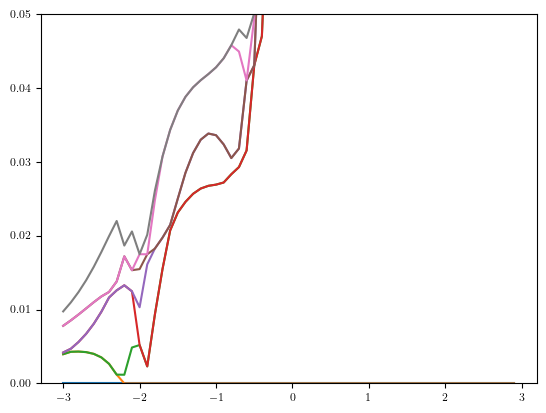

In [15]:
plt.plot(x,((E[:,:8].T-E[:,0])/np.sqrt(np.array(x)**2 + 3)).T)
plt.ylim([0,0.05])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True] [-3.0, -2.9, -2.8, -2.6999999999999997, -2.5999999999999996, -2.4999999999999996, -2.3999999999999995, -2.2999999999999994, -2.1999999999999993, -2.099999999999999, -1.9999999999999991, -1.899999999999999, -1.799999999999999, -1.6999999999999988, -1.5999999999999988, -1.4999999999999987, -1.3999999999999986, -1.2999999999999985, -1.1999999999999984, -1.0999999999999983, -0.9999999999999982, -0.8999999999999981, -0.799999999999998, -0.699999999999998, -0.5999999999999979, -0.4999999999999978, -0.3999999999999977, -0.2999999999999976, -0.1999999999999975, -0.09999999999999742, 0.0, 0.1, 0.20000000000000004, 0.30000000000000004, 

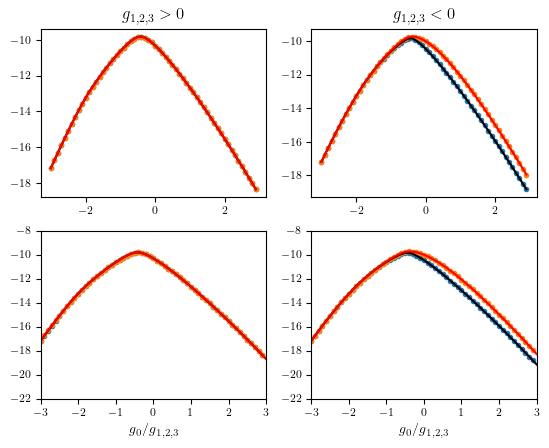

In [11]:
from scipy.interpolate import PchipInterpolator
LinearInterpolator = lambda X,Y : lambda x : np.interp(x,X,Y)

# lattice = lats[2]

# sector = (4,4,4,4)

# rfi_111 = RingInterpolator_111(lats[0], sector = (4,2,6,6), interpolation_f=PchipInterpolator)

# rfi_111 = RingInterpolator_111(lats[3], sector = (6,6,6,6), interpolation_f=PchipInterpolator)
# rfi_111 = RingInterpolator_111(lats[1], sector = (8,8,8,8), interpolation_f=PchipInterpolator)
# rfi_111 = RingInterpolator_111(lats[0], sector = (9,9,10,8), interpolation_f=PchipInterpolator)
# rfi_111 = RingInterpolator_111(lats[0], sector = (9,9,8,10), interpolation_f=PchipInterpolator)
rfi_111 = RingInterpolator_111(lats[0], sector = (9,6,8,13), interpolation_f=PchipInterpolator)
# rfi_111 = RingInterpolator_111(lats[0], sector = (12,6,12,6), interpolation_f=PchipInterpolator)


plot_E_interp_quality(rfi_111, x_lims = [-3,3], recip=False,y_lims = [-22,-8])
# plot_E_interp_quality(rfi_111, x_lims = [-3,3], recip=True,y_lims = [-404,44])

/Users/alaricsanders/.virtualenvironment/py/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/alaricsanders/.virtualenvironment/py/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.05)

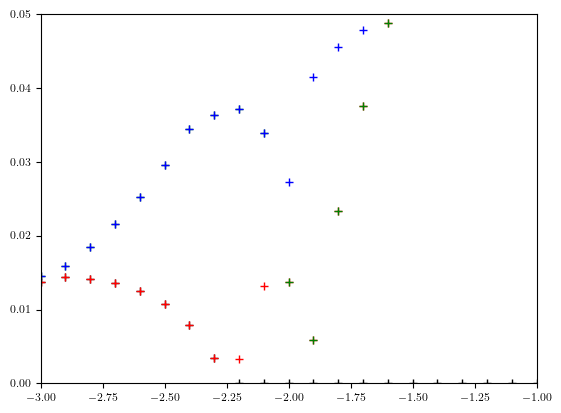

In [30]:
e0 = rfi_111.E_list[1][:,0]

plt.plot(rfi_111.x_list[1],rfi_111.E_list[1][:,1]-e0,'k+')
plt.plot(rfi_111.x_list[1],rfi_111.E_list[1][:,2]-e0,'r+')
plt.plot(rfi_111.x_list[1],rfi_111.E_list[1][:,3]-e0,'g+')
plt.plot(rfi_111.x_list[1],rfi_111.E_list[1][:,4]-e0,'b+')
plt.xlim([-3,-1])
plt.ylim([0,0.05])

NameError: name 'add_phasedia_boundaries' is not defined

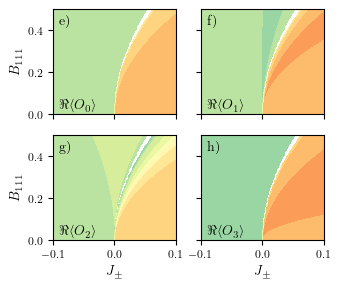

In [16]:
from matplotlib import colors

jpm_arr, B_arr, rf_vals, gap_vals, x_vals = calc_phasedia_data(rfi = rfi_111, field_direction = [1,1,1])

fig, Ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(3.5,3))
c = []
lettr = ord('e')
for sl, ax in enumerate(Ax.ravel()):

    # ax = Ax[ij]
    c.append(
        ax.contourf(jpm_arr, B_arr, rf_vals[sl],
                    extend='both',
                            levels=np.linspace(-0.5,0.5,21),
                          cmap='Spectral')
    )

    ax.text(0.05,0.05,rf"$\Re \langle O_{sl} \rangle$",transform=ax.transAxes)
    ax.text(0.05,0.95,f"{chr(lettr)})",transform=ax.transAxes,verticalalignment='top')
    lettr += 1

Ax[1,0].set_xlabel(r"$J_{\pm}$")
Ax[1,1].set_xlabel(r"$J_{\pm}$")
Ax[0,0].set_ylabel(r"$B_{111}$")
Ax[1,0].set_ylabel(r"$B_{111}$")


for a in Ax.ravel():
    add_phasedia_boundaries(a,jpm_arr, B_arr, [1,1,1], color='k',lw=1)

fig.colorbar(c[0],ax=Ax)
# fig.savefig("/Users/alaricsanders/Desktop/222_B111_ED_ring_phase_dia.pdf")

NameError: name 'add_phasedia_boundaries' is not defined

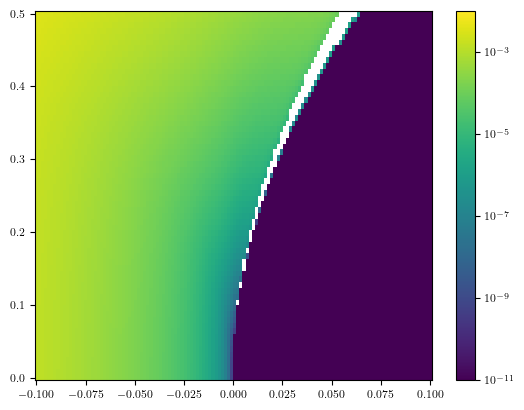

In [18]:
# the gap closing diagram

n = matplotlib.colors.LogNorm(vmin=1e-11, vmax=0.01, clip=True)
fig, ax = plt.subplots()
c = ax.pcolormesh(jpm_arr, B_arr, gap_vals,norm=n)
# c = ax.pcolormesh(jpm_arr, B_arr, x_vals,vmax=11,vmin=-11)
fig.colorbar(c)
add_phasedia_boundaries(ax,jpm_arr, B_arr, [1,1,1], color='k',lw=1)

# fig.savefig("~/Desktop/222_ED_ring_phase_dia.png")
# # cax = fig.add_axes([0.9,0.4,0.05,0.4])
# fig, ax = plt.subplots()
# c = ax.pcolormesh(jpm_arr, B_arr, x_vals, vmin=-4, vmax=4, cmap='RdYlBu')
# fig.colorbar(c)

In [ ]:
# rfi_110 = RingInterpolator_110(lats[0],(4,4,4,4),interpolation_f=LinearInterpolator )

# rfi_110 = RingInterpolator_110(lats[1],(6,6,6,6),interpolation_f=LinearInterpolator )

rfi_110 = RingInterpolator_110(con, lats[0],sector=(9,9,10,8),interpolation_f=LinearInterpolator )

plot_E_interp_quality(rfi_110)

In [ ]:
# FINAL PLOT

import itertools


def make_summary_plot(fig, rfi_111, rfi_110,
    bottom = 0.15,
    height = 0.37,
    left = 0.26,
    left2 = 0.07,
    width = 0.13,
    wspace = 0.02,
    hspace =0.028
                      
                     ):
    
    
    Ax = [[],[]]
    
    for i in range(4):
        Ax[1].append( fig.add_axes([left+i*(width + wspace), bottom, width, height ])    )
        Ax[0].append( fig.add_axes([left+i*(width + wspace), bottom+height+hspace, width, height ]) )
    
    
    Ax2 = [fig.add_axes([left2, bottom+height+hspace, width, height]),fig.add_axes([left2, bottom, width, height])]
    
    c = []
    c_gap = []
    for ax_l, ax2, rfh, field_dir in zip(
        Ax, Ax2, [rfi_111, rfi_110], [[1,1,1], [0,1,1]]):
        jpm_arr, B_arr, rf_vals, gap_vals, x_vals = calc_phasedia_data(rfi = rfh, field_direction = field_dir)
        for sl in range(4):
            ax = ax_l[sl]
            c.append( ax.contourf(jpm_arr, B_arr, rf_vals[sl],levels=np.linspace(-0.4,0.4,41),cmap='Spectral') )
            add_phasedia_boundaries(ax, jpm_arr, B_arr, field_dir, ls=':', zorder=100,
                                    color='k',lw=1)
            
            ax.set_xticks([-0.1,-0.05,0,0.05,0.1])
            ax.set_xticklabels([])
            
            # if sl != 0:
            ax.set_yticklabels([])
    
        n = matplotlib.colors.LogNorm(vmin=1e-9, vmax=1e-4, clip=True)
        c_gap.append(ax2.pcolormesh(jpm_arr, B_arr, gap_vals,norm=n))
        ax2.set_xticks([-0.1,-0.05,0,0.05,0.1])
        ax2.set_xticklabels([])
        add_phasedia_boundaries(ax2, jpm_arr, B_arr, field_dir, ls=':', color='k',lw=1)
    
    Ax2[-1].set_xticklabels([-0.1,'',0,'',0.1])
    
    for sl, a in enumerate(Ax[0]):
        # a.text(0.05,0.05,rf"$\Re \langle O_{sl} \rangle$",transform=ax.transAxes)
        a.set_title(rf"$\Re \langle O_{sl} \rangle $")
    
    
    for a in itertools.chain(Ax[-1],[Ax2[1]]):
        a.axvline(0,color='k',lw=1,ls=':')
    
    # subplot labels 
    lettr= ord('a')
    for row in range(2):
        for a in itertools.chain([Ax2[row]],Ax[row]):
            a.text(0.05,0.05,f"{chr(lettr)})",transform=a.transAxes,verticalalignment='bottom')
            lettr += 1
    
    
    # gap closing guides


    for a in itertools.chain(Ax[1], [Ax2[1]]):
        a.set_xlabel(r'$J_\pm/J_y$')
        a.set_xticklabels([-0.1,'',0,'',0.1])
        a.tick_params(axis='x', labelrotation=0)
        a.set_xlim([-0.1,0.1])
    
    
    # Ax[0][0].set_ylabel(r'$B_{111}$')
    Ax2[0].set_ylabel(r'$B_{111}$')
    # Ax[1][0].set_ylabel(r'$B_{011}$')
    Ax2[1].set_ylabel(r'$B_{011}$')
    
    
    
    cax_x = left2+width+wspace*0.5
    cax = fig.add_axes(
        [left+width*4+wspace*3.5,bottom, 0.01, height*2 + hspace]
        # [cax_x,bottom, 0.01, height]
    )
    fig.colorbar(c[0],ax=Ax,cax=cax)

    # the gap colorbar
    cax2 = fig.add_axes(
        [left2+(width+wspace/2),bottom, 0.01, height*2 + hspace]
        # [cax_x,bottom+height+hspace, 0.01, height]
        # [left2, height
    )
    Ax2[0].set_title(r'Gap / $J_y$')
    fig.colorbar(c_gap[0],ax=Ax2,cax=cax2)

In [ ]:
fig = plt.figure(figsize=(7,3))
lat = lats[3]
sector = (9,9,8,10)

# lat = lats[2]
# sector = (6,6,6,6)

# lat = lats[1]
# sector = (8,8,8,8)

make_summary_plot(fig, 
                  rfi_110=RingInterpolator_110(lats[4],sector=(9,9,8,10),interpolation_f=PchipInterpolator ),
                  rfi_111=RingInterpolator_111(lats[3],sector=(6,6,6,6),interpolation_f=PchipInterpolator ),
    bottom = 0.15,
    height = 0.37,
    left = 0.3,
    left2 = 0.07,
    width = 0.14,
    wspace = 0.02,
    hspace =0.032
                 )
fig.savefig('/Users/alaricsanders/Desktop/unified_flux_phases_ED.pdf')
fig.add_axes([0,0,1,1]).patch.set_alpha(0)

In [ ]:
# rfi_110 = RingInterpolator_110(lats[0],(4,4,4,4),interpolation_f=LinearInterpolator )
# rfi_110 = RingInterpolator_110(lats[1],(6,6,6,6),interpolation_f=LinearInterpolator )
rfi_110 = RingInterpolator_110(lats[2],(9,9,8,10),interpolation_f=LinearInterpolator )

plot_interp_quality(rfi_110)
plot_E_interp_quality(rfi_110)

In [ ]:
jpm_arr, B_arr, rf_vals, gap_vals, _ = calc_phasedia_data(rfi = rfi_110, field_direction = [0,1,1])

fig, Ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(3.5,3))
c = []

lettr = ord('a')
for sl, ax in enumerate(Ax.ravel()):
    
    # ax = Ax[ij]
    c.append(
        ax.contourf(jpm_arr, B_arr, rf_vals[sl],
                       extend='both',
                            levels=np.linspace(-0.5,0.5,21),
                          cmap='Spectral')
    )

    ax.text(0.05,0.05,rf"$\Re \langle O_{sl} \rangle$",transform=ax.transAxes)
    ax.text(0.05,0.95,f"{chr(lettr)})",transform=ax.transAxes,verticalalignment='top')
    
    lettr += 1

Ax[1,0].set_xlabel(r"$J_{\pm}$")
Ax[1,1].set_xlabel(r"$J_{\pm}$")
Ax[0,0].set_ylabel(r"$B_{110}$")
Ax[1,0].set_ylabel(r"$B_{110}$")


for a in Ax.ravel():
    add_phasedia_boundaries(a,jpm_arr, B_arr, [0,1,1],color='k')

fig.colorbar(c[0],ax=Ax)

fig.savefig("/Users/alaricsanders/Desktop/222_B110_ED_ring_phase_dia.pdf")


n = matplotlib.colors.LogNorm(vmin=1e-9, vmax=1e-4, clip=True)
# n = matplotlib.colors.Normalize(vmin=0, vmax=1e-4, clip=True)
fig, ax = plt.subplots()
ax.plot(-0.45*B_arr**2+0.36*B_arr**4, B_arr, ':', color='r')
c = ax.pcolormesh(jpm_arr, B_arr, gap_vals,norm=n)
fig.colorbar(c)
add_phasedia_boundaries(ax,jpm_arr, B_arr, [0,1,1],color='k')

# Gap closing scaling

In [ ]:
def n_cells(lat_vecs):
    V0 = np.linalg.det([[0,4,4],[4,0,4],[4,4,0]])
    return int(abs(np.round(np.linalg.det(np.array(convert_sparray(lat_vecs),dtype='int'))/V0)))

In [ ]:
lat_sector_sets = [
    (lats[0], (4,4,4,4)),
    (lats[1], (6,6,6,6)),
    # (lats[1], (12,4,4,4)),
    (lats[2], (9,9,8,10))
]

rfi_110_sets = [RingInterpolator_110(lat, sector, interpolation_f=LinearInterpolator) for lat, sector in lat_sector_sets]
rfi_111_sets = [RingInterpolator_111(lat, sector, interpolation_f=LinearInterpolator) for lat, sector in lat_sector_sets]


In [ ]:

fig, Ax = plt.subplots(2)
power = 1
for ax, rfi_sets in zip(Ax, [rfi_110_sets, rfi_111_sets]):
    for (lat,_), rfi, c in zip(lat_sector_sets, rfi_sets,['r','g','b','orange']):
        # ax.plot(np.pow(rfi.x_list[1],power), (rfi.E_list[1][:, 1]-rfi.E_list[1][:, 0])/n_cells(lat),'.')
        el = np.sort(np.real(rfi.E_list[1]),axis=1)
        ax.plot(rfi.x_list[1], (el[:, 1]-el[:, 0])/n_cells(lat),'+',color=c)
        # ax.plot(rfi.x_list[1], (el[:, 2]-el[:, 0])/n_cells(lat),'+',color=c)
    
    ax.axhline(0,color='k',lw=0.4)
    ax.set_ylabel(r"Gap / eV\,$\rm{cell}^{-1}$")
    ax.set_yscale('log')
    ax.set_ylim([1e-5, 1])
    
ax110, ax111 = Ax

# ax110.set_ylim([-0.1,0.2])

# ax111.set_ylim([-0.1,0.2])

ax110.set_xlim([-1,1])
ax111.set_xlim([-3,1])

ax110.legend([f"{n_cells(lat)*4} sites" for lat, _ in lat_sector_sets])